In [21]:
import pandas as pd
import seaborn as sns
from google.colab import files

In [22]:
url_dbAMP_Antifungal_2024= "https://raw.githubusercontent.com/AnaLuisaIA/antifungal-peptides/refs/heads/main/Base%20de%20datos/dbAMP/dbAMP_Antifungal_2024.fasta"

df= pd.read_csv(url_dbAMP_Antifungal_2024, header=None, names=["Sequence"], engine="python")
df.to_csv("dbAMP_Antifungal_2024.csv", index=False)
df.head()

,Sequence
0,>dbAMP_00004
1,AACARFIDDFCDTLTPNIYRPRDNGQRCYAVNGHRCDFTVFNTNNG...
2,>dbAMP_00024
3,AAFRGCWTKNYSPKPCL
4,>dbAMP_00025


In [23]:
df = df.drop(df.index[::2])
df.head()

,Sequence
1,AACARFIDDFCDTLTPNIYRPRDNGQRCYAVNGHRCDFTVFNTNNG...
3,AAFRGCWTKNYSPKPCL
5,AAFRGCWTKNYSPKPCLGKR
7,AAGMGFFGAR
9,AAGYPFGIKV


In [24]:
df['label'] = 1
df.head()

,Sequence,label
1,AACARFIDDFCDTLTPNIYRPRDNGQRCYAVNGHRCDFTVFNTNNG...,1
3,AAFRGCWTKNYSPKPCL,1
5,AAFRGCWTKNYSPKPCLGKR,1
7,AAGMGFFGAR,1
9,AAGYPFGIKV,1


In [25]:
df.shape

(5708, 2)

### Limpieza

Verificar duplicados

In [26]:
df = df

# 1. Crear el DataFrame que solo contiene las filas con secuencias duplicadas
filas_con_secuencias_duplicadas = df[
    df.duplicated(subset=['Sequence'], keep=False)
].sort_values(by='Sequence') # Ordenamos para que las secuencias repetidas aparezcan juntas

# 2. Imprimir los resultados
if len(filas_con_secuencias_duplicadas) > 0:
    print(f"Se encontraron {len(filas_con_secuencias_duplicadas)} filas con secuencias duplicadas (incluyendo la primera aparición).")
    print("A continuación se muestran las filas duplicadas:")

    # Mostramos las columnas relevantes para la secuencia y actividad
    print(filas_con_secuencias_duplicadas[['Sequence', 'label']].head(20))
else:
    print("¡No se encontraron secuencias duplicadas en tu DataFrame!")

Se encontraron 24 filas con secuencias duplicadas (incluyendo la primera aparición).
A continuación se muestran las filas duplicadas:
                                               Sequence  label
4677                             FFRNLWKGAKAAFRAGHAAWRA      1
5699                             FFRNLWKGAKAAFRAGHAAWRA      1
6517                                FFSMIPKIATGIASLVKDL      1
4693                                FFSMIPKIATGIASLVKDL      1
4673                                      FLPIVAKLLSGLL      1
5681                                      FLPIVAKLLSGLL      1
4687                                FLSLIPKIAGGIASLVKDL      1
6515                                FLSLIPKIAGGIASLVKDL      1
6301  GSKRWRKFEKKVKKALEDAKEKLQEERVQKIVEHTKEALPVIKAVA...      1
4681  GSKRWRKFEKKVKKALEDAKEKLQEERVQKIVEHTKEALPVIKAVA...      1
4683            GSKRWRKFEKRVKKIFEETKEALPVVQGVVAVATAVGRR      1
6299            GSKRWRKFEKRVKKIFEETKEALPVVQGVVAVATAVGRR      1
4679            GSKRWRKFEKRVKKVFEHTKEALPVIQGVAT

In [27]:
df_sin_duplicados = df.drop_duplicates(subset=['Sequence'], keep='first')
df_sin_duplicados.shape

(5696, 2)

###Verificación de secuencias canónicas

In [28]:
df_sin_duplicados = df_sin_duplicados.copy()
df_sin_duplicados["Sequence"] = df_sin_duplicados["Sequence"].str.strip() #eliminamos los posibles espacios en la secuencia

In [29]:
valid_mask = df_sin_duplicados["Sequence"].str.fullmatch(r"[ACDEFGHIKLMNPQRSTVWY]+", na=False)
invalid_df = df_sin_duplicados[~valid_mask].copy()
invalid_df

,Sequence,label
147,ALSCGTVNSNLAACIGYLTQNAPLARGCCTGVTNLNNMAXTTP,1
239,ARFDIQNKCPYTVWAASVPVGGGRQLNSGQTWXIDAP,1
241,ASGGTVGXYGAWMRSXSLVSXSTITTFS,1
275,ATFDIQNKXTYTVWAAAWAPSYPGGXKQLD,1
293,ATFTIRNNXPYTVWAAASPGGGRRLDMARIWGRTNXNFD,1
...,...,...
11407,FVPWFSKFlXRILC,1
11409,FVPWFSKFlXRILGGC,1
11411,CFVPWFSKFlXRIL,1
11413,CGGFVPWFSKFlXRIL,1


In [30]:
# Mantener solo secuencias canónicas
filtered = df_sin_duplicados[valid_mask].copy()
filtered.shape

(5277, 2)

In [31]:
df_dbAMP = filtered

### Longitud

In [32]:
df_dbAMP = df_dbAMP.copy()  # opcional pero limpio
df_dbAMP["Largo"] = df_dbAMP["Sequence"].str.len()
df_dbAMP["Largo"].describe()

,Largo
count,5277.000000
mean,28.213189
std,26.667182
min,2.000000
25%,13.000000
50%,20.000000
75%,34.000000
max,449.000000


<Axes: xlabel='Largo', ylabel='Count'>

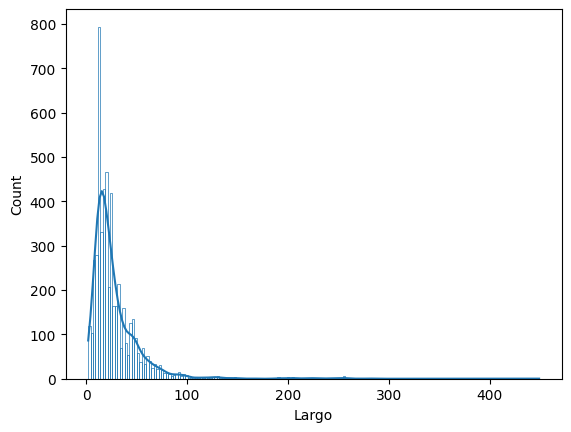

In [33]:
sns.histplot(data=df_dbAMP, x="Largo", fill=False, kde=True)

In [34]:
df_largo = df_dbAMP[df_dbAMP["Largo"] > 100]
df_largo

,Sequence,label,Largo
87,AGFSMDKANSEACRDGLRAVMECRNVTHLLQQELTEAQKGFQDVEA...,1,121
111,AIQDFCVADYSAPQGPAGYSCKNPAKVTVDNFVYSGLGITGNTTNL...,1,191
123,AKITFTNNCPRTIWPGTLTSDQKPQLPNTGFVLASKASLTLGVQAP...,1,221
201,ANTAFVSSACNTQKIPSGSPFNRNLRAMLADLRQNTAFSGYDYKTS...,1,108
219,APQSITELCSEYHNTQIYTINDKILSYTESMAGKREMVIITFKSGA...,1,113
...,...,...,...
10511,MAFTKFLFVITLITIASAGFVWEDDDDLFPGFSDTFKMREIPEIKS...,1,108
11109,MAHYTTLLLSTLLVGTALAQRGSHHHHHHTKCMGPKDCLYPNPDSC...,1,237
11179,SAQTGGSFFEPFNSYNSGFWQKANGYSNGDMFNCTWRANNVSVTSS...,1,216
11339,MLSTKQLVILGLLGCLSTLQAGVVLNVNPGKSLEEPAVKHLKVSPV...,1,164


In [36]:
df_dbAMP = df_dbAMP.drop('Largo', axis=1)
df_dbAMP.head()

,Sequence,label
1,AACARFIDDFCDTLTPNIYRPRDNGQRCYAVNGHRCDFTVFNTNNG...,1
3,AAFRGCWTKNYSPKPCL,1
5,AAFRGCWTKNYSPKPCLGKR,1
7,AAGMGFFGAR,1
9,AAGYPFGIKV,1


In [37]:
dataframe_a_descargar = df_dbAMP
dataframe_a_descargar.to_csv(
    'dbAMP_Antifungal.csv',  # Nombre que tendrá el archivo
    index=False                        # Importante: No incluir el índice de filas de Pandas
)
files.download('dbAMP_Antifungal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>